In [1]:
import numpy as np

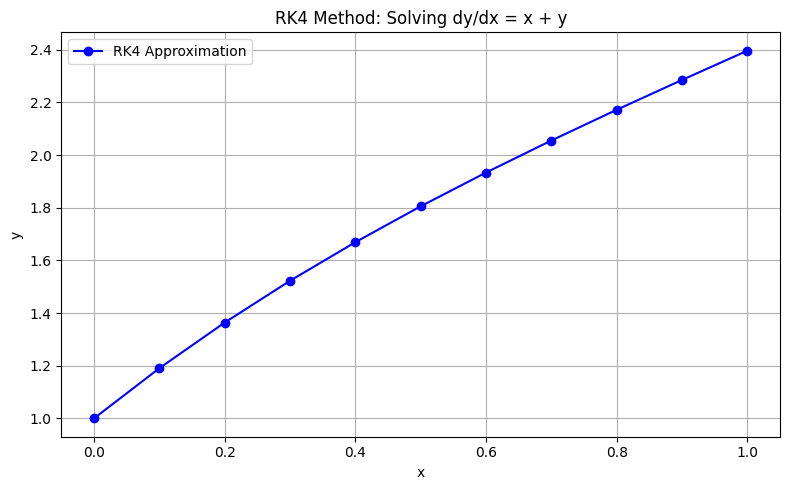

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


def f(x, y):
    return x + 3*math.exp(-x)- 1


def rk4(x0, y0, h, n):
    x_values = [x0]
    y_values = [y0]
    x = x0
    y = y0
    for _ in range(n):
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x += h
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values


x0 = 0
y0 = 1
h = 0.1 
n = 10   


x_vals, y_vals = rk4(x0, y0, h, n)


plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='b', label='RK4 Approximation')
plt.title('RK4 Method: Solving dy/dx = x + y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Final value of y at x = 2 with h = 0.1: 4.593994240332603
Final value of y at x = 2 with h = 0.2: 4.5939955896842175
Final value of y at x = 2 with h = 0.4: 4.594017098676526


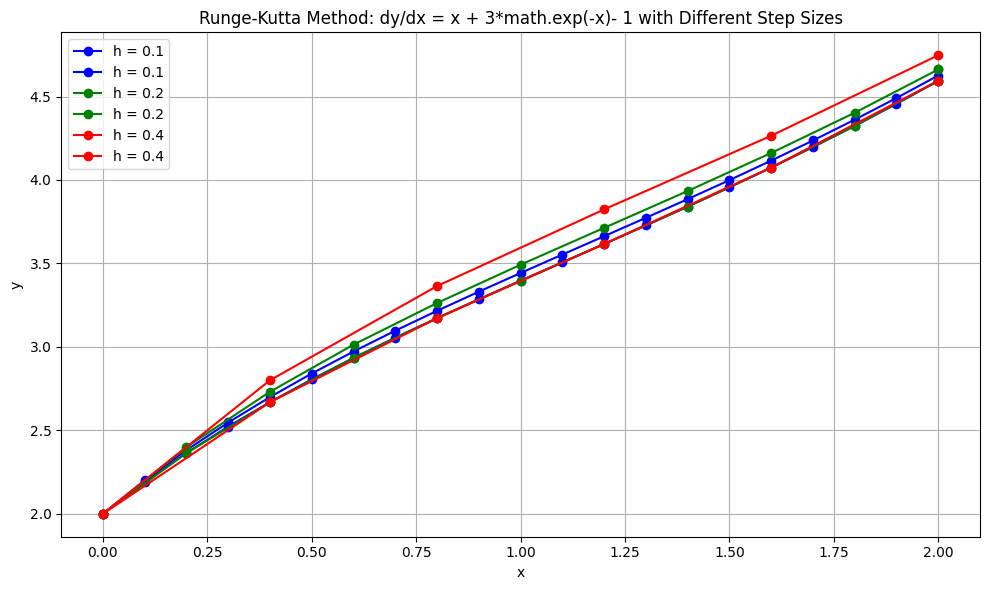

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
def dydx(x, y):
    return x + 3*math.exp(-x)- 1
def rungeKutta(x0, y0, x_end, h):
    x_vals = [x0]
    y_vals = [y0]
    yeular_vals = [y0]

    
    x, y = x0, y0
    yeular=y0
    while x < x_end:
        if x + h > x_end:  # avoid overshooting
            h = x_end - x
        
        k1 = h * dydx(x, y)
        k2 = h * dydx(x + 0.5 * h, y + 0.5 * k1)
        k3 = h * dydx(x + 0.5 * h, y + 0.5 * k2)
        k4 = h * dydx(x + h, y + k3)

        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        yeular+=k1
        x += h

        x_vals.append(x)
        y_vals.append(y)
        yeular_vals.append(yeular)

    return x_vals, y_vals,yeular_vals


x0 = 0
y0 = 2
x_target = 2


step_sizes = [0.1, 0.2, 0.4]
colors = ['b', 'g', 'r','y']


plt.figure(figsize=(10, 6))

for h, color in zip(step_sizes, colors):
    x_vals, y_vals ,yeular_vals= rungeKutta(x0, y0, x_target, h)
    plt.plot(x_vals, y_vals, marker='o', linestyle='-', color=color, label=f'h = {h}')
    plt.plot(x_vals, yeular_vals, marker='o', linestyle='-', color=color, label=f'h = {h}')

    print(f"Final value of y at x = {x_target} with h = {h}: {y_vals[-1]}")

plt.title('Runge-Kutta Method: dy/dx = x + 3*math.exp(-x)- 1 with Different Step Sizes')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




## lagranges 


In [4]:
def lagrange_interpolation(x_points, y_points, x):
   
    n = len(x_points)
    result = 0.0

    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if j != i:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term

    return result

In [5]:

x_data = [0,45,90,180]
y_data = [0,1/(math.sqrt(2)), 1,0]


x_eval = 30
y_eval = lagrange_interpolation(x_data, y_data, x_eval)

print(f"Interpolated value at x = {x_eval}: {y_eval}")

Interpolated value at x = 30: 0.5131918826533801


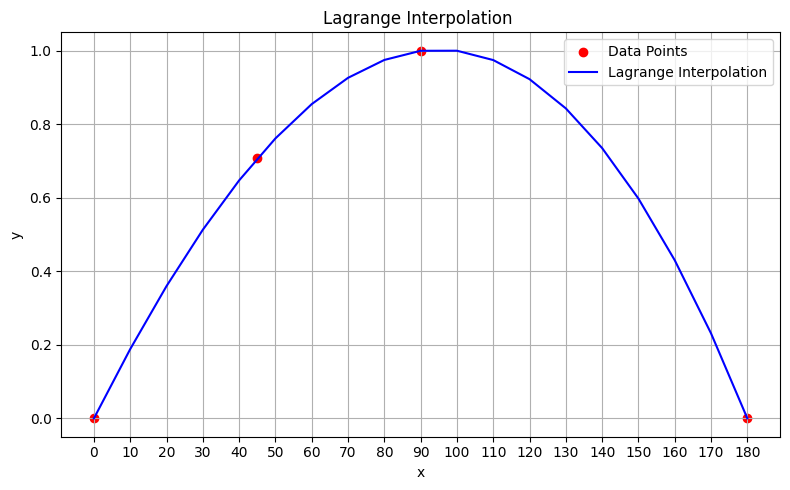

In [8]:
# Create x values for smooth curve
x_plot = np.arange(min(x_data), max(x_data) + 1, 10)
y_plot = [lagrange_interpolation(x_data, y_data, xi) for xi in x_plot]
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_plot, y_plot, label='Lagrange Interpolation', color='blue')


plt.xticks(np.arange(min(x_data), max(x_data)+1, 10))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title("Lagrange Interpolation ")
plt.tight_layout()
plt.show()

## newton raphson 

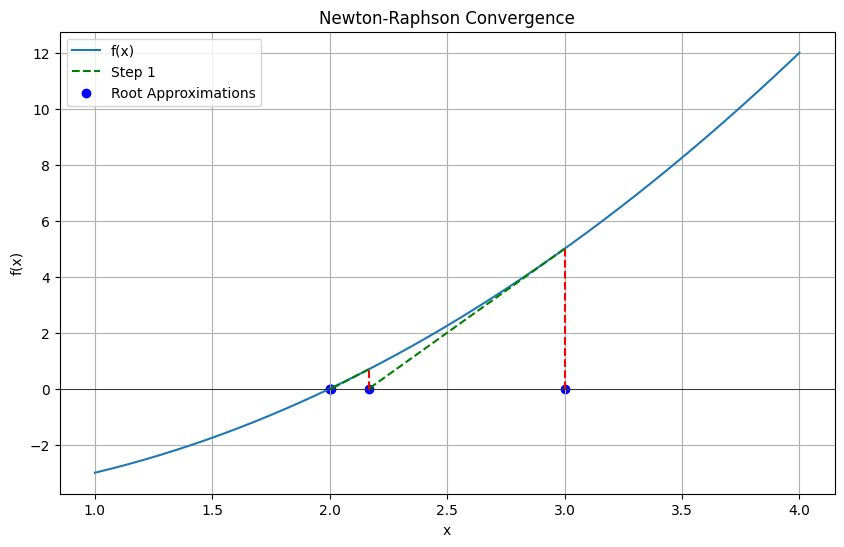

Approximate root: 2.000000000026214


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def newton_raphson_visual(f, df, x0, tol=1e-6, max_iter=20):

    x_vals = [x0]  
    x = x0
    
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            break
        dfx = df(x)
        if dfx == 0:
            raise ValueError("Zero derivative. No solution found.")
        x = x - fx / dfx
        x_vals.append(x)
    
   
    x_plot = np.linspace(min(x_vals) - 1, max(x_vals) + 1, 400)
    y_plot = f(x_plot)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, label='f(x)')  # Function curve
    plt.axhline(0, color='black', linewidth=0.5)  # x-axis
    
    # Plot iterations
    for i, (xi, xi_next) in enumerate(zip(x_vals[:-1], x_vals[1:])):
        plt.plot([xi, xi], [0, f(xi)], 'r--')  # Vertical line to x-axis
        plt.plot([xi, xi_next], [f(xi), 0], 'g--', label=f'Step {i+1}' if i == 0 else "")
    
    plt.scatter(x_vals, [0]*len(x_vals), color='blue', label='Root Approximations')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Newton-Raphson Convergence')
    plt.legend()
    plt.grid()
    plt.show()
    
    return x

# Example 1: Quadratic function (f(x) = x² - 4)
f = lambda x: x**2 - 4
df = lambda x: 2*x
root = newton_raphson_visual(f, df, x0=3)
print(f"Approximate root: {root}")